In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory data analysis

In [83]:
data.shape

(30, 2)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [85]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [86]:
# checking the duplicated data
data.duplicated().sum()

0

In [87]:
# checking the missing value(null value)
data.isna().sum().sum()

0

In [88]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [89]:
# Statistical analysis of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [90]:
# Correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot: >

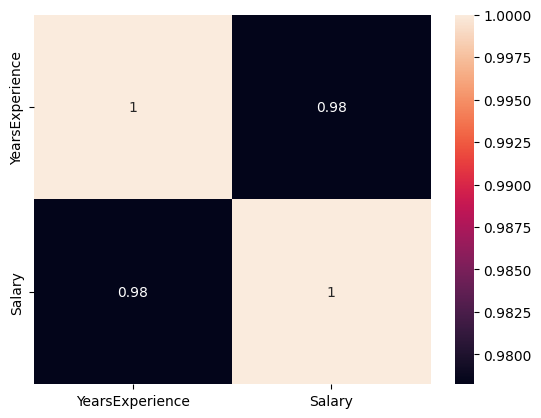

In [91]:
# Heatmap
sns.heatmap(data.corr(),annot=True)

## Extracting the independent and dependent variable

In [92]:
x=data['YearsExperience'].values
y=data['Salary'].values

In [93]:
print(x,'\n\n\n\n',y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5] 



 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


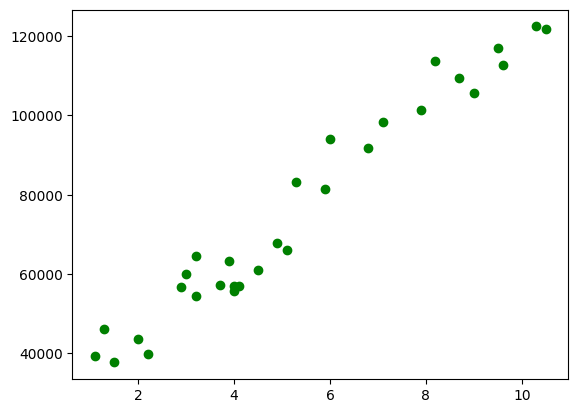

In [94]:
# Scatter plot
plt.scatter(data['YearsExperience'],data['Salary'],color='green')

<AxesSubplot: >

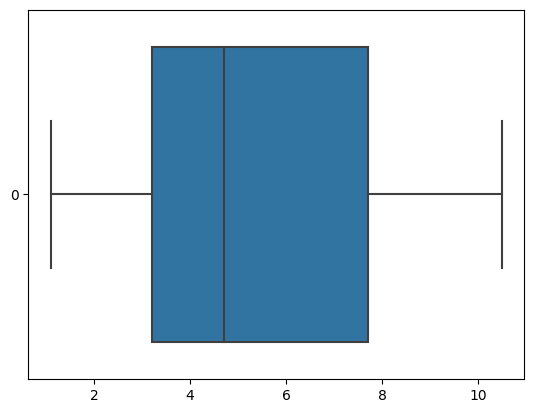

In [95]:
sns.boxplot(data['YearsExperience'],orient='h')

<AxesSubplot: >

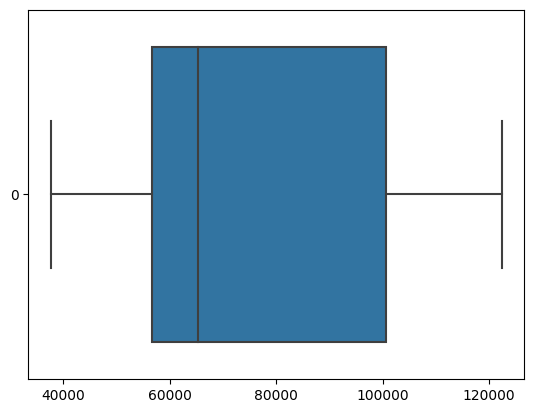

In [96]:
sns.boxplot(data['Salary'],orient='h')

<AxesSubplot: >

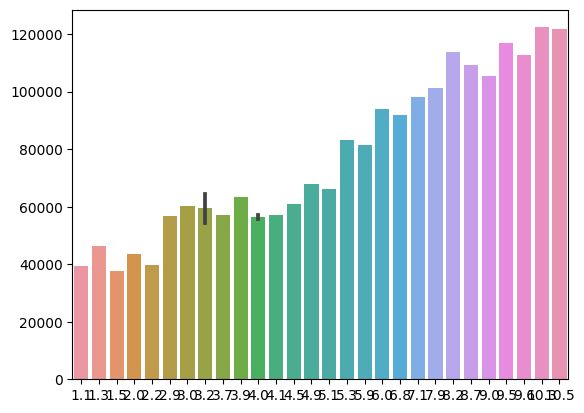

In [97]:
sns.barplot(x=x,y=y)

<AxesSubplot: >

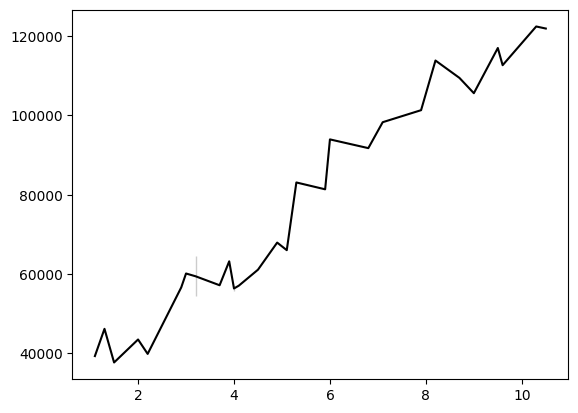

In [98]:
sns.lineplot(x=x,y=y,color='black')

/tmp/ipykernel_4798/1905810504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x),sns.displot(x,kind='kde')


(<AxesSubplot: ylabel='Density'>,
 <seaborn.axisgrid.FacetGrid at 0x7ff2b9ec9600>)

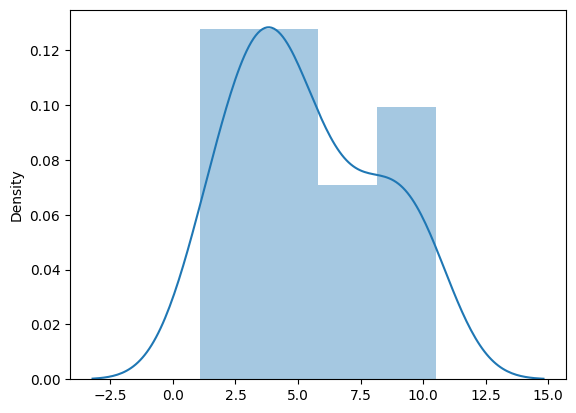

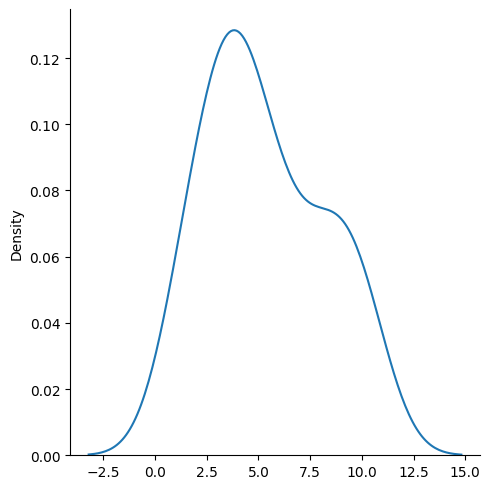

In [99]:
sns.distplot(x),sns.displot(x,kind='kde')

In [100]:
x=data.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [101]:
y=data.iloc[:,-1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting the dataset into training and testing set

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,'\n\n',y_train.shape,y_test.shape)

(24, 1) (6, 1) 

 (24,) (6,)


# Train our linear regression model

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
regresor=LinearRegression()

In [106]:
regresor.fit(x_train,y_train)

LinearRegression()

In [107]:
# predection on the test data
y_pred=regresor.predict(x_test)
y_pred

array([ 68883.83055838, 124441.16796402, 116778.08694256,  64094.40491996,
       111988.66130414,  36315.73621714])

In [108]:
print('B0=(coefficient',regresor.coef_,'\nB1=(intercept)',regresor.intercept_)

B0=(coefficient [9578.85127683] 
B1=(intercept) 25778.9998126238


In [109]:
# predection on unknown data
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [110]:
# we going to test our model. here i give 1.1 as the years experience can we see we get the output near to 39343 as shown above
regresor.predict([[1.1]])
# Here this model shows 36477 as value which is near to 39343

array([36315.73621714])

In [111]:
regresor.predict([[11]])

array([131146.36385781])

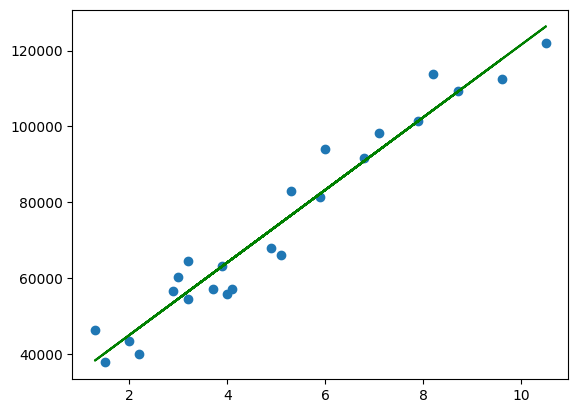

In [112]:
# visualize
plt.scatter(x_train,y_train)
plt.plot(x_train,regresor.predict(x_train),color="green")

In [113]:
# checking accuray of the model
from sklearn.metrics import r2_score

In [114]:
acc=r2_score(y_test,y_pred)
acc

0.9735789625740296

In [115]:
# chekcing the error
from sklearn import metrics

In [116]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

5256.879864107939

## Multi-Linear Regression

In [6]:
d1=pd.read_csv('50_Startups.csv')
d1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
d1.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
d1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
d1.isna().sum().sum()

0

In [11]:
d1['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d9eda94c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d9eda9b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d9eda91f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d9edbc040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d9edbc310>],
 'means': []}

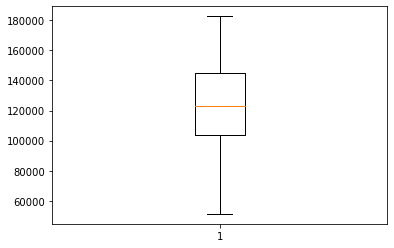

In [12]:
# visualization
plt.boxplot(d1["Administration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d9ec9b820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d9ec9bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d9ec9b550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d9eca83a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d9eca8670>],
 'means': []}

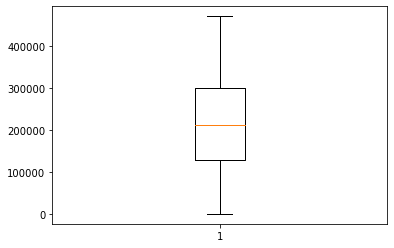

In [13]:
plt.boxplot(d1['Marketing Spend'])

<AxesSubplot:xlabel='State', ylabel='Profit'>

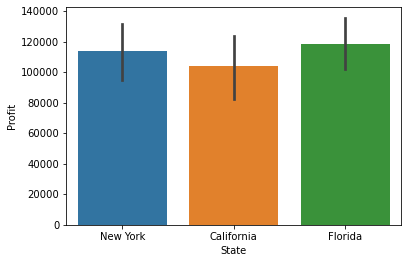

In [14]:
sns.barplot(x=d1['State'],y=d1['Profit'])

<AxesSubplot:xlabel='State', ylabel='Profit'>

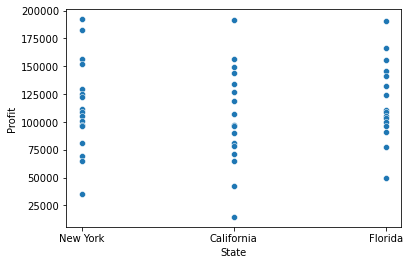

In [15]:
sns.scatterplot(x=d1['State'],y=d1['Profit'])

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

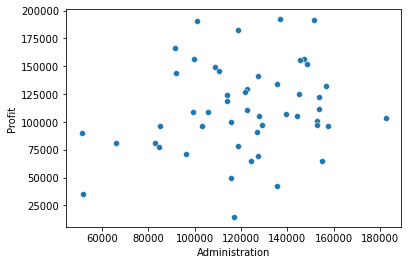

In [16]:
sns.scatterplot(x=d1['Administration'],y=d1['Profit'])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

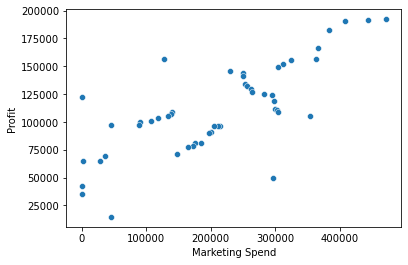

In [17]:
sns.scatterplot(x=d1['Marketing Spend'],y=d1['Profit'])

In [18]:
# converting categorical data (state column) into numerical data
d1=pd.get_dummies(d1,columns=["State"])

In [19]:
d1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [20]:
# Split the data
x=d1.drop(columns=['Profit']).values
y=d1['Profit'].values
print(x,'\n\n',y)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.0067196e+05 9.179

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_test.shape, x_train.shape,y_train.shape, y_test.shape)

(10, 6) (40, 6) (40,) (10,)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
MLR=LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred1=MLR.predict(x_test)
y_pred1

array([104686.90071512, 117702.8957513 , 160386.48587711, 149717.07923122,
        73169.87170714, 158927.56769096,  55380.7907778 , 100721.81201848,
        46375.38120588, 126799.49172014])

In [25]:
from sklearn import metrics
acc2=metrics.r2_score(y_test,y_pred1)
acc2

0.9201902416598308

In [26]:
# error
y_pred_train=MLR.predict(x_train)
np.sqrt(metrics.mean_squared_error(y_test,y_pred1))

11189.637579662056

In [27]:
d1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [28]:
MLR.predict([[190000,895678,80765,1,0,0]])

array([156759.99209336])

In [29]:
MLR.predict([[165349.20,136897.80,47784.10,0,0,1]])

array([188966.80707473])

In [32]:
import pickle

In [35]:
pickle.dump(MLR,open("model.pkl","wb"))